Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figures 9.16 

Confidence intervals of the mean height in a population in a scenario where we know the true population mean\
Topics and relevant videos: [Confidence intervals](https://www.youtube.com/watch?v=soWJ3Wti0FM)

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from numpy.random import default_rng
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rc('font', family='serif', serif='cm10')
# matplotlib.rc('text', usetex=True)
import matplotlib.transforms

font_size = 15
font_size_legend = 15
font_size_ticks = 15

# data = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/ANSUR%20II%20MALE%20Public.csv"

data = pd.read_csv(url, encoding='latin-1')

stature = data['stature'] / 10.
N = len(stature)
population_mean = np.mean(stature)
population_std = np.std(stature)
print("N: " + str(len(stature)))
print("Population mean: " + str(round(population_mean,2)))
print("Population standard deviation: " + str(round(population_std,2)))

N: 4082
Population mean: 175.62
Population standard deviation: 6.85


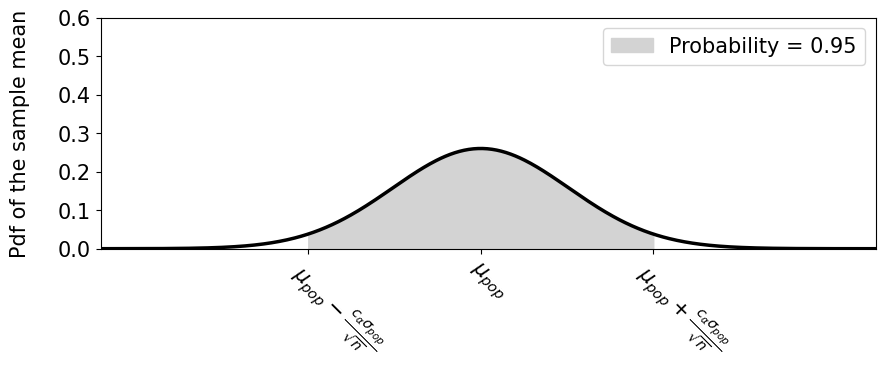

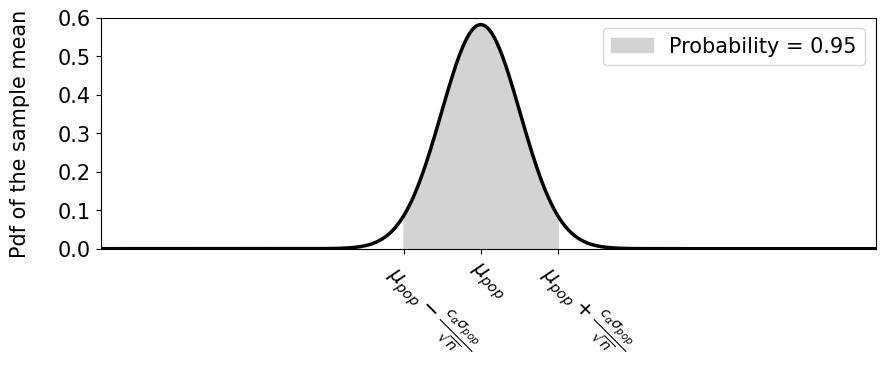

In [4]:
n_vals = [20,100]
n_bins = 20
x_min = 169
x_max = 182.5
x = np.linspace(x_min,x_max,500)
y_max = 0.6
eps = 1e-3

for ind_n,n in enumerate(n_vals):
    fig = plt.figure(figsize=(10,3))
    plt.plot(x,norm.pdf(x,population_mean,population_std/np.sqrt(n)),lw=2.5,color="black")
    Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
    half_width = population_std * Phi_inv / np.sqrt(n)
    ind_interval = np.arange(population_mean-half_width,population_mean+half_width+eps,eps)
    plt.fill_between(ind_interval,norm.pdf(ind_interval,population_mean,population_std/np.sqrt(n)),color="lightgray",
                    label="Probability = 0.95")
    plt.ylim([0,y_max])
    plt.xlim([x_min,x_max])
    plt.yticks(np.arange(0,0.7,0.1),np.round(np.arange(0,0.7,0.1),1),fontsize=font_size_ticks)
    plt.xticks([population_mean-half_width,population_mean,population_mean+half_width],
               [r"$\mu_{pop}-\frac{c_{\alpha}\sigma_{pop}}{\sqrt{n}}$",r"$\mu_{pop}$",r"$\mu_{pop}+\frac{c_{\alpha}\sigma_{pop}}{\sqrt{n}}$"],
               fontsize=font_size,
               rotation=-45,ha="left", rotation_mode="anchor")
    ax = plt.gca()
    plt.ylabel(r"Pdf of the sample mean",fontsize=font_size,labelpad=20)
    plt.legend(fontsize=font_size_legend);

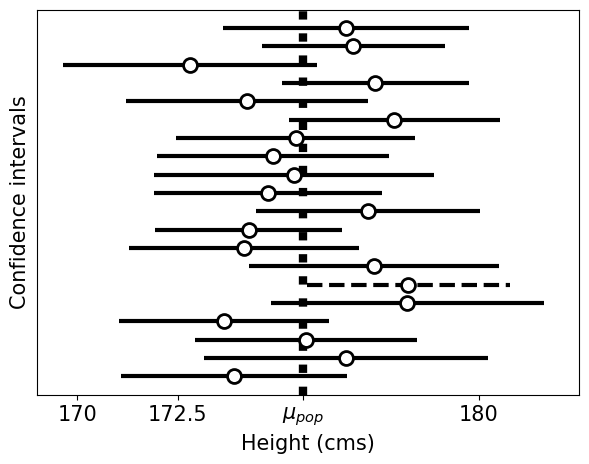

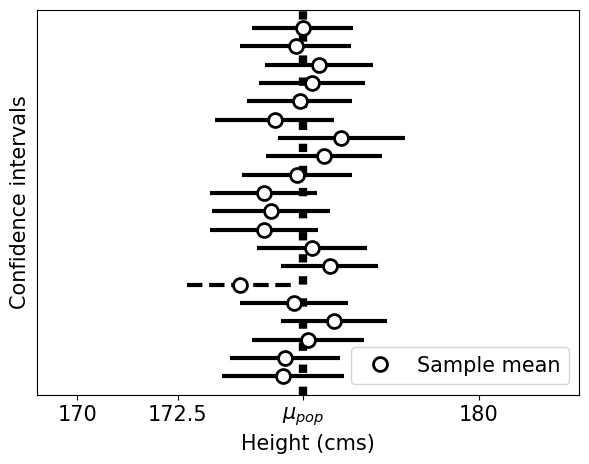

In [5]:
# 0.95 confidence intervals for the sample mean, we verify whether they contain the population mean
rng = default_rng(2021)

tries = 20
for ind_n,n in enumerate(n_vals):
    plt.figure(figsize=(7,5))
    plt.xticks([170,172.5,population_mean,180],[170,172.5,r"$\mu_{pop}$",180],fontsize=font_size)
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)
    plt.yticks([]) 
    plt.vlines(population_mean, -1,tries,lw=6,ls="dotted",color="black")
    plt.xlim(x_min,x_max)
    plt.ylim(-1,tries)
    plt.ylabel(r"Confidence intervals",fontsize=font_size,labelpad=5)
    for ind in range(tries):
        samples = rng.choice(stature,n,replace=True)
        sample_mean = np.mean(samples)
        sample_std = np.std(samples)
        Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
        half_width = sample_std * Phi_inv / np.sqrt(n)
        l = sample_mean - half_width
        u = sample_mean + half_width
        if u < population_mean or l > population_mean:
            plt.hlines(ind,l,u,lw=3,color="black",ls="dashed")
        else:
            plt.hlines(ind,l,u,lw=3,color="black")
        if ind_n == 1 and ind == 0:
            plt.plot(sample_mean,ind,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",
                     markeredgecolor = "black",label="Sample mean")
        else:
            plt.plot(sample_mean,ind,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",
                     markeredgecolor = "black");
    if ind_n == 1:
        plt.legend(fontsize=font_size_legend,loc="lower right");